In [1]:
import pandas as pd
import os

必要なカラム  
* customer_unique_id@cus_df  
* order_purchase_timestamp@ord_df    
* payment_value@pay_df  

フィルタ  
* order_purchase_timestamps@ord_df: 2018/01/01-9/30

In [2]:
os.chdir('../datasets')

cus_df = pd.read_csv('olist_customers_dataset.csv')
# 必要なカラムのみ
cus_df = cus_df.loc[:, ['customer_unique_id', 'customer_id']].sort_values(by='customer_unique_id')

# 重複確認
# -> OK（customer_unique_idは一意だがcustomer_idは一意でない）
print(cus_df['customer_unique_id'].sort_values().duplicated().value_counts())
print(cus_df['customer_id'].sort_values().duplicated().value_counts())

cus_df

False    96096
True      3345
Name: customer_unique_id, dtype: int64
False    99441
Name: customer_id, dtype: int64


,customer_unique_id,customer_id
64012,0000366f3b9a7992bf8c76cfdf3221e2,fadbb3709178fc513abc1b2670aa1ad2
24570,0000b849f77a49e4a4ce2b2a4ca5be3f,4cb282e167ae9234755102258dd52ee8
40832,0000f46a3911fa3c0805444483337064,9b3932a6253894a02c1df9d19004239f
57118,0000f6ccb0745a6a4b88665a16c9f078,914991f0c02ef0843c0e7010c819d642
81150,0004aac84e0df4da2b147fca70cf8255,47227568b10f5f58a524a75507e6992c
...,...,...
89147,fffcf5a5ff07b0908bd4e2dbc735a684,74be082247cd677a147d83ee670e9d53
9810,fffea47cd6d3cc0a88bd621562a9d061,0ecf8e0a08148af0bf313184f167670a
69017,ffff371b4d645b6ecea244b27531430a,27f584b0f1dc4e610065c240f68b6be0
94891,ffff5962728ec6157033ef9805bacc48,832a3b0254347d409512ae92eaf154a6


In [3]:
ord_df = pd.read_csv('olist_orders_dataset.csv')
ord_df['order_purchase_timestamp'] = pd.to_datetime(ord_df['order_purchase_timestamp'])
# 必要なカラムのみ
ord_df = ord_df.loc[:, ['order_id', 'customer_id', 'order_purchase_timestamp']]
ord_df

,order_id,customer_id,order_purchase_timestamp
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,2017-10-02 10:56:33
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,2018-07-24 20:41:37
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,2018-08-08 08:38:49
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,2017-11-18 19:28:06
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,2018-02-13 21:18:39
...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,2017-03-09 09:54:05
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,2018-02-06 12:58:58
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,2017-08-27 14:46:43
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,2018-01-08 21:28:27


In [4]:
pay_df = pd.read_csv('olist_order_payments_dataset.csv')
# 必要なカラムのみ
pay_df = pay_df.loc[:, ['order_id', 'payment_value']]

# 重複確認
# ->  重複あり（支払いが複数回に渡っている場合など）なので、まとめたい
print(pay_df['order_id'].sort_values().duplicated().value_counts())
# 重複例
display(pay_df[pay_df['order_id'] == '009ac365164f8e06f59d18a08045f6c4'])
display(pay_df[pay_df['order_id'] == '009ac365164f8e06f59d18a08045f6c4'].sum())

# order_idごとにpayment_valueをsumする
pay_df = pay_df.groupby('order_id')['payment_value'].sum().to_frame().reset_index()
# 数値確認
# -> OK
display(pay_df[pay_df.order_id == '009ac365164f8e06f59d18a08045f6c4'])

pay_df

False    99440
True      4446
Name: order_id, dtype: int64


,order_id,payment_value
285,009ac365164f8e06f59d18a08045f6c4,8.75
15298,009ac365164f8e06f59d18a08045f6c4,4.17
16053,009ac365164f8e06f59d18a08045f6c4,0.88
16459,009ac365164f8e06f59d18a08045f6c4,4.50
32058,009ac365164f8e06f59d18a08045f6c4,5.45
73837,009ac365164f8e06f59d18a08045f6c4,8.25


order_id         009ac365164f8e06f59d18a08045f6c4009ac365164f8e...
payment_value                                                   32
dtype: object

,order_id,payment_value
215,009ac365164f8e06f59d18a08045f6c4,32.0


,order_id,payment_value
0,00010242fe8c5a6d1ba2dd792cb16214,72.19
1,00018f77f2f0320c557190d7a144bdd3,259.83
2,000229ec398224ef6ca0657da4fc703e,216.87
3,00024acbcdf0a6daa1e931b038114c75,25.78
4,00042b26cf59d7ce69dfabb4e55b4fd9,218.04
...,...,...
99435,fffc94f6ce00a00581880bf54a75a037,343.40
99436,fffcd46ef2263f404302a634eb57f7eb,386.53
99437,fffce4705a9662cd70adb13d4a31832d,116.85
99438,fffe18544ffabc95dfada21779c9644f,64.71


In [5]:
# マージ
display(ord_df.count())
display(pay_df.count())
merged = pd.merge(ord_df, cus_df, on='customer_id', how='left')
display(merged.count())
print('-----')

display(merged.count())
display(pay_df.count())
merged = pd.merge(merged, pay_df, on='order_id', how='left')
display(merged.count())
print('-----')

merged = merged.loc[:, ['customer_unique_id', 'order_purchase_timestamp', 'payment_value']]
#merged.sort_values(by=['order_purchase_timestamp', 'customer_unique_id'])
merged.sort_values(by=['customer_unique_id', 'order_purchase_timestamp'])

order_id                    99441
customer_id                 99441
order_purchase_timestamp    99441
dtype: int64

order_id         99440
payment_value    99440
dtype: int64

order_id                    99441
customer_id                 99441
order_purchase_timestamp    99441
customer_unique_id          99441
dtype: int64

-----


order_id                    99441
customer_id                 99441
order_purchase_timestamp    99441
customer_unique_id          99441
dtype: int64

order_id         99440
payment_value    99440
dtype: int64

order_id                    99441
customer_id                 99441
order_purchase_timestamp    99441
customer_unique_id          99441
payment_value               99440
dtype: int64

-----


,customer_unique_id,order_purchase_timestamp,payment_value
52798,0000366f3b9a7992bf8c76cfdf3221e2,2018-05-10 10:56:27,141.90
73889,0000b849f77a49e4a4ce2b2a4ca5be3f,2018-05-07 11:11:27,27.19
26460,0000f46a3911fa3c0805444483337064,2017-03-10 21:05:03,86.22
98493,0000f6ccb0745a6a4b88665a16c9f078,2017-10-12 20:29:41,43.62
41564,0004aac84e0df4da2b147fca70cf8255,2017-11-14 19:45:42,196.89
...,...,...,...
87007,fffcf5a5ff07b0908bd4e2dbc735a684,2017-06-08 21:00:36,2067.42
20556,fffea47cd6d3cc0a88bd621562a9d061,2017-12-10 20:07:56,84.58
43943,ffff371b4d645b6ecea244b27531430a,2017-02-07 15:49:16,112.46
96853,ffff5962728ec6157033ef9805bacc48,2018-05-02 15:17:41,133.69


In [6]:
# calibrationデータとholdoutデータに分割して検証
# https://github.com/CamDavidsonPilon/lifetimes/blob/master/lifetimes/utils.py#L27
from lifetimes.utils import calibration_and_holdout_data

summary = calibration_and_holdout_data(merged, 'customer_unique_id', 'order_purchase_timestamp',
                                        calibration_period_end='2018-04-30',
                                        monetary_value_col='payment_value')

# ちょっとデータが少なすぎるから期間を調整。。
summary = summary[summary.frequency_cal >0]
summary

,frequency_cal,recency_cal,T_cal,monetary_value_cal,frequency_holdout,monetary_value_holdout,duration_holdout
customer_unique_id,,,,,,,
004288347e5e88a27ded2bb23747066c,1.0,171.0,277.0,103.28,0.0,0.00,170
0058f300f57d7b93c477a131a59b36c3,1.0,31.0,70.0,96.02,0.0,0.00,170
011575986092c30523ecb71ff10cb473,1.0,60.0,72.0,80.32,0.0,0.00,170
011b4adcd54683b480c4d841250a987f,1.0,177.0,251.0,149.88,0.0,0.00,170
013f4353d26bb05dc6652f1269458d8d,1.0,4.0,157.0,164.04,0.0,0.00,170
...,...,...,...,...,...,...,...
fe59d5878cd80080edbd29b5a0a4e1cf,2.0,76.0,327.0,39.60,0.0,0.00,170
fe81bb32c243a86b2f86fbf053fe6140,2.0,124.0,190.0,71.33,2.0,692.16,170
fed519569d16e690df6f89cb99d4e682,1.0,88.0,131.0,110.26,0.0,0.00,170


In [7]:
# 相関なしと判断
summary[['monetary_value_cal', 'frequency_cal']].corr()

,monetary_value_cal,frequency_cal
monetary_value_cal,1.000000,-0.010517
frequency_cal,-0.010517,1.000000


In [8]:
# 購買期間確認
# -> 2016/09-2018/10末あたり
merged.sort_values(by='order_purchase_timestamp')

,customer_unique_id,order_purchase_timestamp,payment_value
4541,b7d76e111c89f7ebf14761390f0f7d17,2016-09-04 21:15:19,136.23
4396,4854e9b3feff728c13ee5fc7d1547e92,2016-09-05 00:15:34,75.06
10071,009b0127b727ab0ba422f6d9604487c7,2016-09-13 15:24:19,40.95
30710,830d5b7aaa3b6f1e9ad63703bec97d23,2016-09-15 12:16:38,NaN
83078,0eb1ee9dba87f5b36b4613a65074337c,2016-10-02 22:07:52,109.34
...,...,...,...
50387,9bb92bebd4cb7511e1a02d5e50bc4655,2018-09-29 09:13:03,137.03
88500,634420a0ea42302205032ed44ac7fccc,2018-10-01 15:30:09,80.38
31891,af5454198a97379394cacf676e1e96cb,2018-10-03 18:55:29,197.55
68373,262e1f1e26e92e86375f86840b4ffd63,2018-10-16 20:16:02,222.03


In [9]:
# Fitting
from lifetimes import BetaGeoFitter

bgf = BetaGeoFitter(penalizer_coef=0.0)
bgf.fit(summary['frequency_cal'], summary['recency_cal'], summary['T_cal'])
print(bgf)

<lifetimes.BetaGeoFitter: fitted with 1372 subjects, a: 1.94, alpha: 2167.04, b: 0.24, r: 23.76>


In [10]:
# 推定されたパラメータ
bgf.summary

,coef,se(coef),lower 95% bound,upper 95% bound
r,23.763582,19.628038,-14.707373,62.234537
alpha,2167.037426,1859.364435,-1477.316866,5811.391719
a,1.941988,0.544062,0.875627,3.008350
b,0.236872,0.072311,0.095143,0.378601


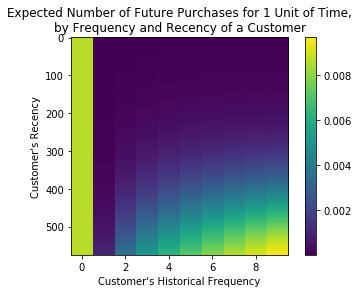

In [12]:
# Frequency/Recency Matrix
from lifetimes.plotting import plot_frequency_recency_matrix
plot_frequency_recency_matrix(bgf)

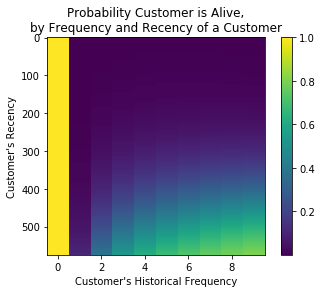

In [13]:
# 生存確率
from lifetimes.plotting import plot_probability_alive_matrix
plot_probability_alive_matrix(bgf)

In [18]:
# predeicted_purchases
# https://github.com/CamDavidsonPilon/lifetimes/blob/71d97ba52e1d730cda70b771038a3dc4c42f310a/lifetimes/fitters/beta_geo_fitter.py#L199
t = 30
summary['predicted_purchases'] = bgf.conditional_expected_number_of_purchases_up_to_time(t, summary['frequency_cal'], summary['recency_cal'], summary['T_cal'])
display(summary.sort_values(by='predicted_purchases').head(5))
display(summary.sort_values(by='predicted_purchases').tail(5))

,frequency_cal,recency_cal,T_cal,monetary_value_cal,frequency_holdout,monetary_value_holdout,duration_holdout,predicted_purchases
customer_unique_id,,,,,,,,
f7b62c75467e8ce080b201667cbbc274,1.0,1.0,571.0,41.93,0.0,0.0,170,0.000094
f7b981e8a280e455ac3cbe0d5d171bd1,1.0,13.0,493.0,19.62,0.0,0.0,170,0.000226
a5d3bfee5b23b430b95c4ae295e1028a,1.0,2.0,464.0,104.30,0.0,0.0,170,0.000264
325e19085f3017b73be3d9fd98a93301,1.0,12.0,466.0,65.05,0.0,0.0,170,0.000290
a7bbfaf8a288c45dc38d4693535dd63f,1.0,9.0,456.0,44.42,0.0,0.0,170,0.000309


,frequency_cal,recency_cal,T_cal,monetary_value_cal,frequency_holdout,monetary_value_holdout,duration_holdout,predicted_purchases
customer_unique_id,,,,,,,,
56c8638e7c058b98aae6d74d2dd6ea23,3.0,281.0,292.0,220.303333,0.0,0.00,170,0.155078
3e43e6105506432c953e165fb2acf44c,5.0,162.0,224.0,214.788000,0.0,0.00,170,0.173834
1b6c7548a2a1f9037c1fd3ddfed95f33,6.0,93.0,168.0,151.143333,0.0,0.00,170,0.184458
f0e310a6839dce9de1638e0fe5ab282a,5.0,320.0,345.0,59.470000,0.0,0.00,170,0.203391
ca77025e7201e3b30c44b472ff346268,4.0,199.0,203.0,136.832500,2.0,143.16,170,0.204028


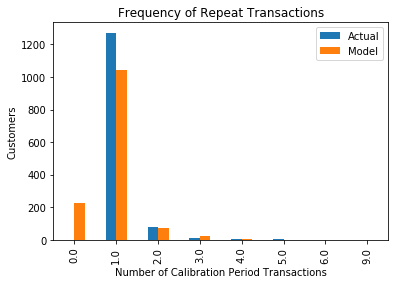

In [19]:
# モデル評価（ActualとModelが近ければ良い）
from lifetimes.plotting import plot_period_transactions
plot_period_transactions(bgf)